## Import Libraries and Data

In [1]:
import PipettingMassBalance as pmb
import pandas as pd
%matplotlib notebook

speciesList = pmb.PipettingSpecies.readCSV('SpeciesDictionary.csv')
instructions = pmb.PipettingInstructions.readCSV('DoE_csv/MasterDataset_OT_DoE_03-06-04-23.csv', firstRow=258, lastRow=264)
targetVolume = 10
sampleList = pmb.PipettingSample.createSamples(instructions,targetVol=targetVolume)
maxVolume = 1
for sample in sampleList:
    sample.getTotalDensity(speciesDictionary=speciesList)
    sample.getVolFracSeries(speciesDictionary=speciesList)
steps = pmb.PipettingStep.createSteps(instructions=instructions,speciesDictionary=speciesList,sampleList=sampleList,maxVol=maxVolume)

massProfile = pmb.MassProfile('mass_data/MassProfile_030423_S259-264.csv',t_baseline=25,derivNoise=0.005,secDerivNoise=0.001)
#default t_baseline=25

## Analyse Water Addition

In [2]:
(water_mass,t1)=massProfile.analyseWater(avg_window=10,bl_mult=5)
water=pmb.PipettingSpecies.getSpecies(speciesList, 'water')
water_volume_act=water.getVolume(water_mass)
water_volume_set=0
for sample in sampleList:
    water_volume = sample.waterVol
    water_volume_set = water_volume_set + water_volume
    sample.actualMass = water_volume/water.density
print("This equals a volume of " + str(round(water_volume_act,3)) + "m; expected was "\
      + str(round(water_volume_set,3)) + "mL; error is " + str(round(abs((water_volume_set-water_volume_act)/water_volume_set)*100,3)) + "%")

Water Transfer started at t=78s and ended at t=462s; mass=44.000949999999996g
This equals a volume of 44.089m; expected was 44.377mL; error is 0.648%


## Analyse Surfactants

Peak threshold for 1st derivative = 0.0025 g/s and for 2nd derivative = 0.0010625 g/s^2


<IPython.core.display.Javascript object>


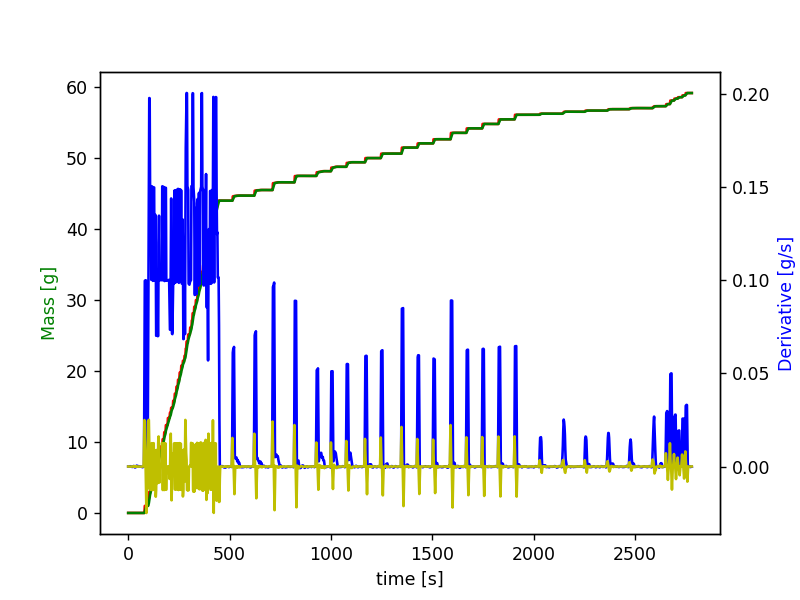

Addition of 0.711g Plantacare 818 detected from 510s to 546s - expected volume = 0.818mL and actual volume = 0.653mL (resulting error is 20.18%)
Addition of 0.789g Plantacare 2000 detected from 618s to 656s - expected volume = 0.872mL and actual volume = 0.725mL (resulting error is 16.937%)
Addition of 1.09g Plantacare 2000 detected from 708s to 746s - expected volume = 0.991mL and actual volume = 0.99mL (resulting error is 0.082%)
Addition of 0.917g Dehyton MC detected from 816s to 844s - expected volume = 0.913mL and actual volume = 0.836mL (resulting error is 8.362%)
Addition of 0.667g Dehyton ML detected from 924s to 970s - expected volume = 0.813mL and actual volume = 0.616mL (resulting error is 24.193%)
Addition of 0.626g Dehyton ML detected from 996s to 1034s - expected volume = 0.572mL and actual volume = 0.578mL (resulting error is 1.163%)
Addition of 0.641g Dehyton ML detected from 1072s to 1106s - expected volume = 0.572mL and actual volume = 0.591mL (resulting error is 3.47

In [3]:
t2 = massProfile.analyseIngredients(avg_window=5, bl_mult=5, mergeSens=10, specType='surfactant', steps=steps,start_idx=t1,show=True)

## Analyse Polyelectrolytes

Peak threshold for 1st derivative = 0.0031249999999999993 g/s and for 2nd derivative = 0.0014843749999999996 g/s^2


<IPython.core.display.Javascript object>


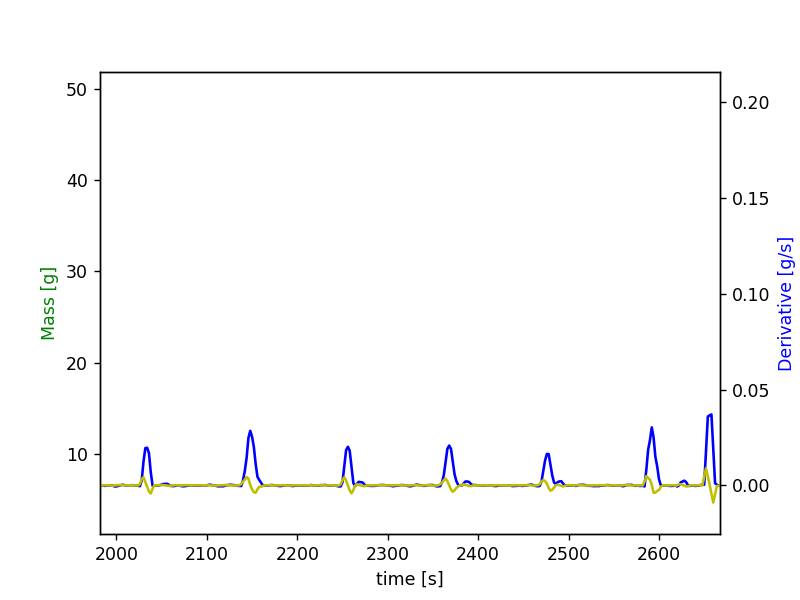

Addition of 0.153g Luviquat Excellence detected from 2026s to 2044s - expected volume = 0.173mL and actual volume = 0.137mL (resulting error is 20.941%)
Addition of 0.284g Luviquat Excellence detected from 2138s to 2160s - expected volume = 0.271mL and actual volume = 0.258mL (resulting error is 4.891%)
Addition of 0.156g Luviquat Excellence detected from 2248s to 2266s - expected volume = 0.149mL and actual volume = 0.14mL (resulting error is 6.437%)
Addition of 0.195g Luviquat Excellence detected from 2360s to 2378s - expected volume = 0.189mL and actual volume = 0.174mL (resulting error is 7.701%)
Addition of 0.144g Luviquat Excellence detected from 2468s to 2486s - expected volume = 0.135mL and actual volume = 0.129mL (resulting error is 4.387%)
Addition of 0.265g Luviquat Excellence detected from 2582s to 2604s - expected volume = 0.251mL and actual volume = 0.237mL (resulting error is 5.446%)


In [4]:
# default bl_mult = 5, default mergeSens = 5
t3 = massProfile.analyseIngredients(avg_window=4, bl_mult=5, mergeSens=5, specType='polyelectrolyte',steps=steps,start_idx=t2,show=True)

## Analyse Thickeners

Peak threshold for 1st derivative = 0.011250000000000001 g/s and for 2nd derivative = 0.004375 g/s^2


<IPython.core.display.Javascript object>


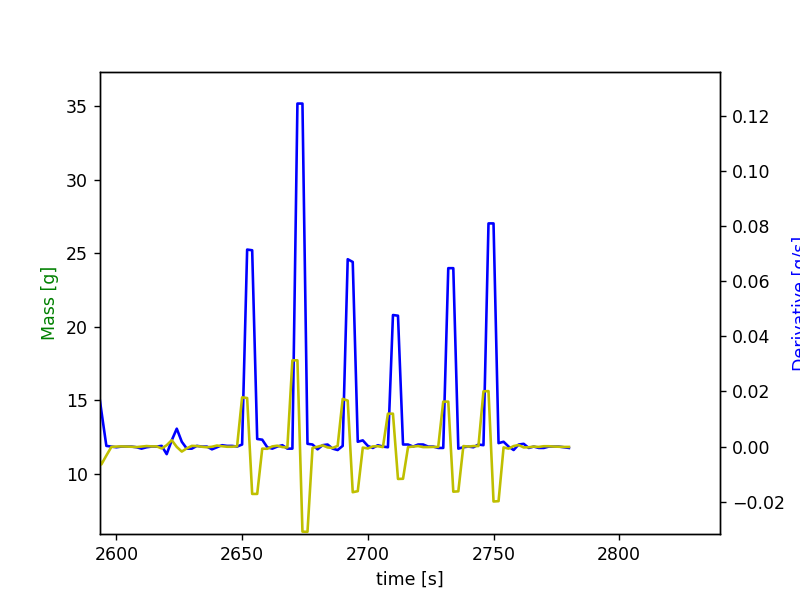

Addition of 0.297g Arlypon F detected from 2648s to 2660s - expected volume = 0.33mL and actual volume = 0.334mL (resulting error is 1.19%)
Addition of 0.497g Arlypon F detected from 2668s to 2680s - expected volume = 0.55mL and actual volume = 0.568mL (resulting error is 3.216%)
Addition of 0.275g Arlypon F detected from 2688s to 2700s - expected volume = 0.294mL and actual volume = 0.31mL (resulting error is 5.364%)
Addition of 0.194g Arlypon F detected from 2706s to 2718s - expected volume = 0.207mL and actual volume = 0.219mL (resulting error is 6.011%)
Addition of 0.255g Arlypon F detected from 2728s to 2740s - expected volume = 0.269mL and actual volume = 0.288mL (resulting error is 7.143%)
Addition of 0.332g Arlypon F detected from 2744s to 2756s - expected volume = 0.357mL and actual volume = 0.375mL (resulting error is 5.063%)


In [5]:
t4 = massProfile.analyseIngredients(avg_window=1, bl_mult=5, mergeSens=1, specType='thickener',steps=steps,start_idx=t3,show=True)

## Consolidate results and create output

In [ ]:
for step in steps:
    step.addToSample()
actualMassFractions = pd.DataFrame(dtype='float64').reindex_like(instructions)
actualMassFractions[:]=0
for i in range(len(sampleList)):
    actualMassFractions['ID'].iloc[i] = sampleList[i].sampleId
    for entry in sampleList[i].addedMassSeries.iteritems():
        actualMassFractions[entry[0]].iloc[i] = entry[1]/sampleList[i].actualMass*100
actualMassFractions.to_csv('mass_data/FreshlyAnalysed_030423_S253-S258.csv', index=False)
actualMassFractions